<a href="https://colab.research.google.com/github/AshwinUnnikrishnan/120-Data-Science-Interview-Questions/blob/master/grounding_DINO_%2B_HQ_SAM_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment Objective :  Use Grounding

## Cloning Grounding Dino And SAM HQ

Checking if GPU is being used and CUDA

In [1]:
!nvidia-smi

Mon Feb 26 01:09:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

print("PyTorch version:", torch.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.1.0+cu121
CUDA is available: True


#### CLONING SAM HQ

In [3]:
!git clone https://github.com/SysCV/sam-hq.git
!pip install timm
os.chdir('sam-hq')
!export PYTHONPATH=$(pwd)
from segment_anything import sam_model_registry, SamPredictor

Cloning into 'sam-hq'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 443 (delta 105), reused 76 (delta 66), pack-reused 262
Receiving objects: 100% (443/443), 42.16 MiB | 13.59 MiB/s, done.
Resolving deltas: 100% (202/202), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.5 MB/s eta 0:00:00


/content/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_5m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_11m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/sam-hq/segment_anything/modeling/tiny_vit_sam.py:662: UserWarning: Overwriting tiny_vit_21m_224 in registry with segment_anything.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/content/sam-hq/se

##### Loading SAM-HQ checkpoints

In [4]:
!mkdir pretrained_checkpoint
!wget https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth
!mv sam_hq_vit_l.pth pretrained_checkpoint

--2024-02-26 01:09:42--  https://huggingface.co/lkeab/hq-sam/resolve/main/sam_hq_vit_l.pth
Resolving huggingface.co (huggingface.co)... 13.33.33.110, 13.33.33.55, 13.33.33.20, ...
Connecting to huggingface.co (huggingface.co)|13.33.33.110|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/d9/4e/d94e04992ac4e3ea45fcc1c523974540cdbef274e295d4aaacc69b4f19ee63b7/e1a6c385d62bf005ded91a54d5ec55c985cfc4103ef89c08d90f39f04934c343?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27sam_hq_vit_l.pth%3B+filename%3D%22sam_hq_vit_l.pth%22%3B&Expires=1709168983&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwOTE2ODk4M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9kOS80ZS9kOTRlMDQ5OTJhYzRlM2VhNDVmY2MxYzUyMzk3NDU0MGNkYmVmMjc0ZTI5NWQ0YWFhY2M2OWI0ZjE5ZWU2M2I3L2UxYTZjMzg1ZDYyYmYwMDVkZWQ5MWE1NGQ1ZWM1NWM5ODVjZmM0MTAzZWY4OWMwOGQ5MGYzOWYwNDkzNGMzNDM%7EcmVzcG9uc2UtY2

In [5]:
sam_checkpoint = "pretrained_checkpoint/sam_hq_vit_l.pth"
model_type = "vit_l"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

<All keys matched successfully>


#### Cloning Grounding DINO

In [6]:
HOME = os.getcwd()
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 426, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 426 (delta 149), reused 129 (delta 128), pack-reused 231
Receiving objects: 100% (426/426), 12.86 MiB | 7.55 MiB/s, done.
Resolving deltas: 100% (220/220), done.
/content/sam-hq/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.5 MB/s eta 0:00:00
     ━

In [7]:
CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/sam-hq/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [8]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth


/content/sam-hq
/content/sam-hq/weights


In [9]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/sam-hq/weights/groundingdino_swint_ogc.pth ; exist: True


In [10]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/sam-hq/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

#### Cloning Super Resolution

In [11]:
!pip install -qq super-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 3.3 MB/s eta 0:00:00


In [12]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests


super_resolution_model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

pytorch_model_4x.pt:   0%|          | 0.00/6.10M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt


## Path


In [13]:
import math
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import locale
print(locale.getpreferredencoding())
locale.getpreferredencoding = lambda: "UTF-8"
print(locale.getpreferredencoding())

UTF-8
UTF-8


## Upload Images

Choose the directory where the folders are

In [15]:
IMAGE_DIR = r"/content/drive/MyDrive/Medicinal plant dataset"

Print all the sub folders of different plants

In [16]:
# TODO : Need to show which folders have masks created and which doesnt

In [ ]:
directories = [d for d in os.listdir(IMAGE_DIR) if os.path.isdir(os.path.join(IMAGE_DIR, d))]
print("Directories in", IMAGE_DIR, "are:")
for directory in directories:
    print(directory)

In [18]:
Folder_Name = r"Lemon_grass"

In [19]:
IMAGE_PATH = os.path.join(IMAGE_DIR, Folder_Name)

In [ ]:
files = os.listdir(IMAGE_PATH)

# Filter out only the image files (you can add more extensions if needed)
image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Print the list of image files
print("Images in", IMAGE_PATH, "are:")
for image_file in image_files:
    print(image_file)
print(len(image_files))

# Predict

In [21]:
from torchvision.ops import box_convert
import os
import supervision as sv
import matplotlib.image as mpimg
import math

### JUST GROUNDING DINO

In [22]:
def show_box(box, ax):
  '''
  This function draws a bounding box on a given axes object.

  Parameters:
  box (list or array-like): A list or array-like object of four elements,
                            representing the coordinates of the bounding box
                            in the format [x1, y1, x2, y2].
  ax (matplotlib.axes.Axes): The axes object on which the bounding box will be drawn.

  Returns:
  None. The function draws a rectangle representing the bounding box on the given axes object.
  '''
  x0, y0 = box[0], box[1]
  w, h = box[2] - box[0], box[3] - box[1]
  ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [23]:
import random
import gc

##### temp

In [107]:
from typing import Tuple, List

import cv2
import numpy as np
import supervision as sv
import torch
from PIL import Image
from torchvision.ops import box_convert
import bisect

import groundingdino.datasets.transforms as T


In [103]:
def transform_image(t):
    """
    Transform an RGB image and convert it to a tensor.

    This function takes a PIL Image, applies a series of transformations to it, and returns the original and transformed images.
    The transformations include resizing the image, converting it to a tensor, and normalizing its pixel values.

    Parameters:
    img (PIL.Image.Image): The input image.

    Returns:
    Tuple[np.array, torch.Tensor]: A tuple containing the original image as a NumPy array and the transformed image as a PyTorch tensor.
    """
    tensor = t[0].permute(1, 2, 0)  # Change the order of the dimensions to HWC
    tensor = tensor.mul(255).byte()  # Scale the values to the range 0-255 and convert to bytes
    numpy_array = tensor.cpu().numpy()  # Convert the tensor to a NumPy array

    # Convert the NumPy array to a PIL Image
    img = Image.fromarray(numpy_array)

    transform = T.Compose(
        [
            T.RandomResize([800], max_size=1333),
            T.ToTensor(),
            T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    )
    image = np.asarray(img)
    image_transformed, _ = transform(img, None)
    return image, image_transformed

In [162]:
def generate_boxes_for_images(image_dir, caption="plant"):
    """
    Generate bounding boxes for all images in the specified directory and display the bounding box for a random image.

    Args:
        image_dir (str): Path to the directory containing input images.
        caption (str, optional): Caption to identify the object. Defaults to "plant".

    Returns:
        List of bounding boxes for each image.
    """
    BOX_THRESHOLD = 0.35
    TEXT_THRESHOLD = 0.25
    with torch.no_grad():

      # Get a list of image file paths in the directory
      image_files = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]
      # Initialize an empty list to store bounding boxes for all images
      all_boxes = []
      image_files = image_files[:1]
      # Process each image
      for i, img_path in enumerate(image_files):
          print(f"Processing Image {i+1}")
          #_, img = load_image(img_path)
          image = Image.open(img_path)
          inputs = ImageLoader.load_image(image)

          super_res_image = super_resolution_model(inputs)
          _, img = transform_image(super_res_image)




          boxes, _, _ = predict(model=model, image=img, caption=caption, box_threshold=BOX_THRESHOLD, text_threshold=TEXT_THRESHOLD)
          print(boxes)
          print("----------------------------")
          all_boxes.append(boxes)
          # Delete large objects that are no longer needed
          del inputs
          torch.cuda.empty_cache()  # Clear GPU memory (if using PyTorch)

          # Manually trigger the garbage collector
          gc.collect()
          image.close()


      # Randomly select an image
      random_image_path = random.choice(image_files)
      random_boxes = all_boxes[image_files.index(random_image_path)]


      image = Image.open(random_image_path)
      inputs = ImageLoader.load_image(image)

      super_res_image = super_resolution_model(inputs)
      t, img = transform_image(super_res_image)
      del super_res_image
      torch.cuda.empty_cache()
    print(t.shape)
    print(type(t))
    #t = t.permute(1, 2, 0)  # change (C, H, W) to (H, W, C)
    #t = t.transpose(1, 2, 0)  # change (C, H, W) to (H, W, C)

    img = t.astype(np.uint8)

    box = box_convert(random_boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()
    print(box.shape)
    print(box)
    box = np.array([box[0][0] * img.shape[1], box[0][1] * img.shape[0], box[0][2] * img.shape[1], box[0][3] * img.shape[0]])

    # Display the image with the bounding box
    plt.figure(figsize=(10, 10))

    plt.imshow(img)
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red', linewidth=2))
    plt.axis('off')
    plt.show()

    return all_boxes

In [151]:
gc.collect()

2973

In [134]:
torch.cuda.empty_cache()

Processing Image 1
tensor([[0.4673, 0.5732, 0.6317, 0.7500],
        [0.4820, 0.5729, 0.7148, 0.7500]])
----------------------------
(1800, 2400, 3)
<class 'numpy.ndarray'>
(2, 4)
[[0.15146637 0.19822553 0.7832053  0.9482719 ]
 [0.12460157 0.19792357 0.8394195  0.94794154]]


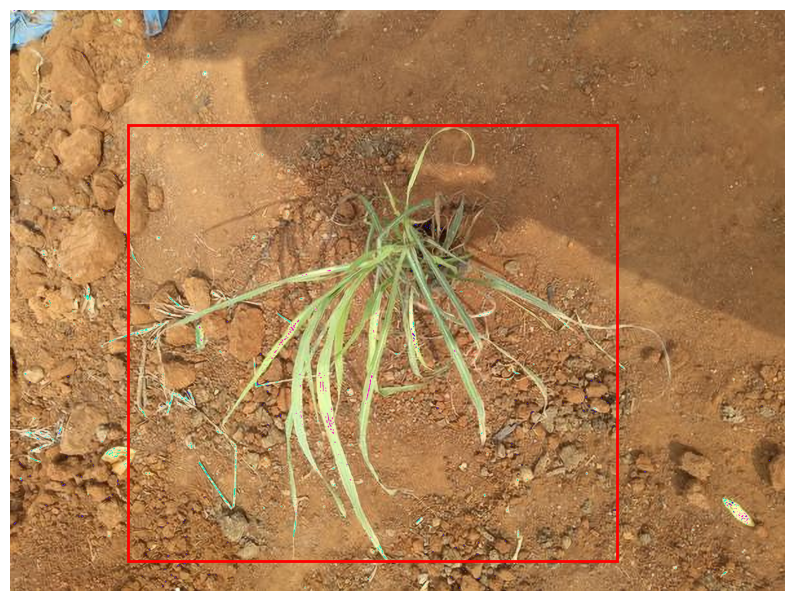

In [163]:
boxes =generate_boxes_for_images(IMAGE_PATH)

##### checkkk


In [156]:
def generate_box(image_path, caption="plant"):
  """
  Generates and displays bounding box around the object identified by the given caption in the image.

  Args:
      image_path (str): Path to the input image.
      caption (str, optional): Caption to identify the object. Defaults to "plant".

  Returns:
      None
  """
  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25

  # https://github.com/IDEA-Research/GroundingDINO/blob/main/groundingdino/util/inference.py
  # load_image, predict etc description
  # USE GROUNDING DINO load_image to load image and the transformed
  print(image_path)
  image_source, images = load_image(image_path)





  boxes, logits, phrases = predict(
      model=model,
      image=images,
      caption="plant",
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )
  print(boxes)
  # Converting the bounding box format to xyxy from centre and width, height
  box = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()
  # Loading the Image
  image_1 = mpimg.imread(image_path)
  image = image_1.astype(np.uint8)
  print(type(image))
  box_size = math.sqrt( (box[0][0] - box[0][2])**2 + (box[0][1] - box[0][3])**2 )

  # converting the box calculated with the transformed image into original image size
  box = np.array([box[0][0]*image.shape[1], box[0][1]*image.shape[0], box[0][2]*image.shape[1], box[0][3]*image.shape[0]])

  plt.figure(figsize=(10, 10))
  print(image_1.shape)
  plt.imshow(image)
  show_box(box, plt.gca())
  plt.axis('off')
  plt.show()


In [67]:
image_files = [os.path.join(IMAGE_PATH, filename) for filename in os.listdir(IMAGE_PATH) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]


/content/sam-hq/GroundingDINO/scaled_8x.jpg


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:993: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


tensor([[0.4917, 0.5729, 0.6849, 0.7508]])
<class 'numpy.ndarray'>
(1800, 2400, 3)


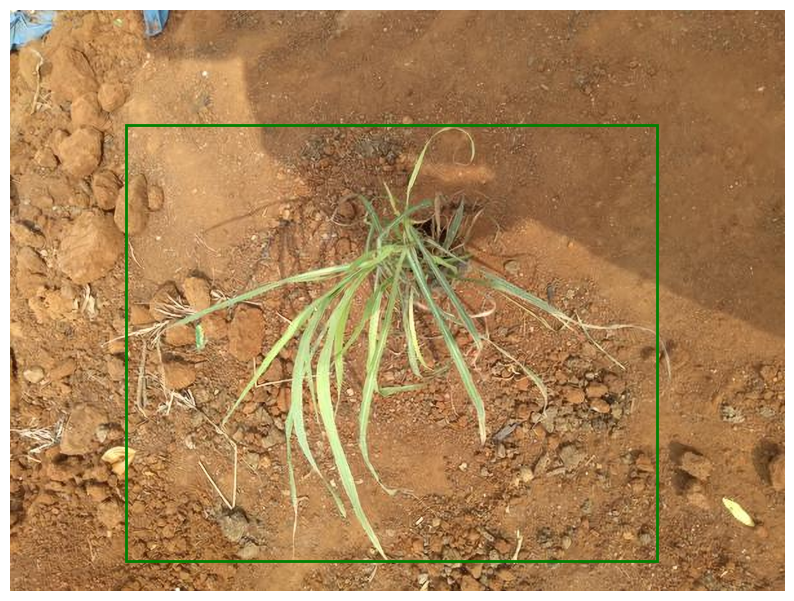

In [157]:
generate_box(r'/content/sam-hq/GroundingDINO/scaled_8x.jpg')

In [116]:
gc.collect()

27

### SAM AND GROUNDING DINO

In [ ]:
def generate(text_prompt, image_path):

  BOX_TRESHOLD = 0.35
  TEXT_TRESHOLD = 0.25

  image_source, image = load_image(image_path)

  # Grounding Dino Box Prediction
  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=text_prompt,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )

  xyxy = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()

  try:
    str(logits[0])
  except:
    print('nothing detected')
    return


  print("Certainty (Grouding dino) for this image is: " + str(logits[0]))

  #Sam Prediction


  image = mpimg.imread(image_path)
  image = image.astype(np.uint8)

  predictor.set_image(image)

  input_box = np.array([xyxy[0][0]*image.shape[1], xyxy[0][1]*image.shape[0], xyxy[0][2]*image.shape[1], xyxy[0][3]*image.shape[0]])

  # predictor is the SAM that predicts the mask
  masks, scores, logits = predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box[None, :],
      multimask_output=False,
  )

  print("SAM score for this mask is: " + str(scores[0]))

  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  print(image.shape)
  show_mask(masks[0], plt.gca())
  #show_box(input_box, plt.gca())
  plt.axis('off')
  plt.show()
  black_background = np.zeros_like(masks[0], dtype=np.uint8)
  black_background[masks[0] != 0] = 255


  return masks[0]
a = generate('plant make it better only green part, dont include the ground below, try to make it clean only selecting the plant', IMAGE_PATH)


In [ ]:
def generate_masks_for_images(text_prompt, image_path):
    BOX_THRESHOLD = 0.35
    TEXT_THRESHOLD = 0.25

    # Load the model (replace with your actual model)
    # Get a list of image file paths in the specified directory
    image_files = [os.path.join(image_path, filename) for filename in os.listdir(image_path) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_path in image_files:
        _, img = load_image(img_path)
        boxes, logits, phrases = predict(model=model, image=img, caption=text_prompt, box_threshold=BOX_THRESHOLD, text_threshold=TEXT_THRESHOLD)
        xyxy = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()

        try:
            str(logits[0])
        except:
            print(f'No object detected in {img_path}')
            continue

        print(f"Certainty (Grounding dino) for {img_path} is: {logits[0]}")

        image = mpimg.imread(img_path)
        image = image.astype(np.uint8)

        # SAM Prediction
        predictor.set_image(image)
        input_box = np.array([xyxy[0][0] * image.shape[1], xyxy[0][1] * image.shape[0], xyxy[0][2] * image.shape[1], xyxy[0][3] * image.shape[0]])

        # predictor is the SAM that predicts the mask
        masks, scores, _ = predictor.predict(point_coords=None, point_labels=None, box=input_box[None, :], multimask_output=False)

        print(f"SAM score for the mask in {img_path} is: {scores[0]}")

        # Plot image and mask
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(masks[0], cmap='gray')
        plt.title("Mask")
        plt.axis('off')

        plt.show()

        # Create a black background with the mask
        black_background = np.zeros_like(masks[0], dtype=np.uint8)
        black_background[masks[0] != 0] = 255

        # You can save the black_background or further process it as needed


In [ ]:
a = generate_masks_for_images('plant make it better only green part, dont include the ground below, try to make it clean only selecting the plant', IMAGE_PATH)


In [ ]:
inputs = ImageLoader.load_image(image)
super_res_image = super_resolution_model(inputs)

ImageLoader.save_image(preds, './scaled_8x.jpg')
ImageLoader.save_compare(inputs, preds, './scaled_8x_compare.jpg')

In [ ]:
def generate_masks_for_images(text_prompt, image_path):
    BOX_THRESHOLD = 0.35
    TEXT_THRESHOLD = 0.25

    # Load the model (replace with your actual model)
    # Get a list of image file paths in the specified directory
    image_files = [os.path.join(image_path, filename) for filename in os.listdir(image_path) if filename.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_path in image_files:
        _, img = load_image(img_path)


        inputs = ImageLoader.load_image(image)
        super_res_image = super_resolution_model(inputs)



        boxes, logits, phrases = predict(model=model, image=img, caption=text_prompt, box_threshold=BOX_THRESHOLD, text_threshold=TEXT_THRESHOLD)
        xyxy = box_convert(boxes=boxes, in_fmt="cxcywh", out_fmt="xyxy").numpy()

        try:
            str(logits[0])
        except:
            print(f'No object detected in {img_path}')
            continue

        print(f"Certainty (Grounding dino) for {img_path} is: {logits[0]}")

        image = mpimg.imread(img_path)
        image = image.astype(np.uint8)

        # SAM Prediction
        predictor.set_image(image)
        input_box = np.array([xyxy[0][0] * image.shape[1], xyxy[0][1] * image.shape[0], xyxy[0][2] * image.shape[1], xyxy[0][3] * image.shape[0]])

        # predictor is the SAM that predicts the mask
        masks, scores, _ = predictor.predict(point_coords=None, point_labels=None, box=input_box[None, :], multimask_output=False)

        print(f"SAM score for the mask in {img_path} is: {scores[0]}")

        # Plot image and mask
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(masks[0], cmap='gray')
        plt.title("Mask")
        plt.axis('off')

        plt.show()

        # Create a black background with the mask
        black_background = np.zeros_like(masks[0], dtype=np.uint8)
        black_background[masks[0] != 0] = 255

        # You can save the black_background or further process it as needed


In [ ]:
a = generate('plant make it better only green part, dont include the ground below, try to make it clean only selecting the plant', IMAGE_PATH)

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(a)
#show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

EVENTUAL GOAL IS TO MAKE THE NOTEBOOK GOOD ENOUGH FOR PEOPLE TO UPLOAD IT AND MAKE MASK AND SEE THE MASK OF ALL THE IMAGES AND SAVE IT

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)



def show_res(masks, scores, input_point, input_label, input_box, image):
    for i, (mask, score) in enumerate(zip(masks, scores)):
        plt.figure(figsize=(10,10))
        plt.imshow(image)
        show_mask(mask, plt.gca())
        if input_box is not None:
            box = input_box[i]
            show_box(box, plt.gca())
        if (input_point is not None) and (input_label is not None):
            show_points(input_point, input_label, plt.gca())

        print(f"Score: {score:.3f}")
        plt.axis('off')
        plt.show()


def show_res_multi(masks, scores, input_point, input_label, input_box, image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    for mask in masks:
        show_mask(mask, plt.gca(), random_color=True)
    for box in input_box:
        show_box(box, plt.gca())
    for score in scores:
        print(f"Score: {score:.3f}")
    plt.axis('off')
    plt.show()
